# Working with the MNIST dataset
http://yann.lecun.com/exdb/mnist/

Load the dataset

In [ ]:
from keras.datasets import mnist
import numpy as np

(train_X, train_y), (test_X, test_y) = mnist.load_data()
print(f'train_X: {train_X.shape} → type: {type(train_X)}')
print(f'train_y: {train_y.shape} → type: {type(train_y)}')
print(f'test_X: {test_X.shape} → type: {type(test_X)}')
print(f'test_y: {test_y.shape} → type: {type(test_y)}')

11490434/11490434 [==============================] - 2s 0us/step
train_X: (60000, 28, 28) → type: <class 'numpy.ndarray'>
train_y: (60000,) → type: <class 'numpy.ndarray'>
test_X: (10000, 28, 28) → type: <class 'numpy.ndarray'>
test_y: (10000,) → type: <class 'numpy.ndarray'>


Flatten each array to a 28x28 = 784 dimensional vector

In [ ]:
train_X = train_X.reshape(train_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)
print(f'train_x: {train_X.shape}')
print(f'test_x: {test_X.shape}')


train_x: (60000, 784)
test_x: (10000, 784)


Rescale images from the range of [0,255] to the range of [0.0,1.0] 

In [ ]:
test_X = test_X / 255.
train_X = train_X / 255.

Plot first 9 entries in the dataset

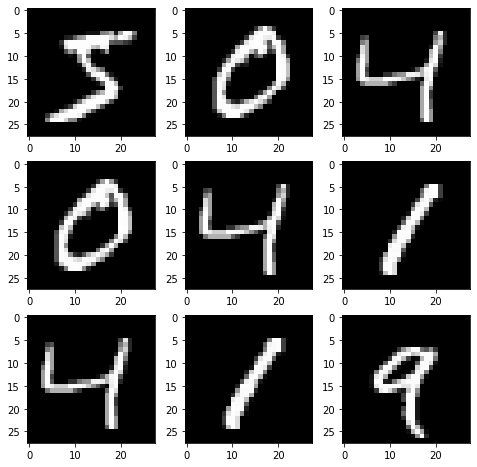

In [ ]:
import matplotlib.pyplot as plt

fig,axes = plt.subplots(nrows=3, ncols=3, figsize=(8,8))
for i in range(3):
  for j in range(3):
    axes[i,j].imshow(train_X[i+j].reshape(28,28), cmap=plt.get_cmap('gray'))


Convert to Pandas dataframes

In [ ]:
import pandas as pd

# data
df_X_train = pd.DataFrame(data=train_X)
df_X_test = pd.DataFrame(data=test_X)

# labels
df_y_train = pd.DataFrame(data=train_y)
df_y_test = pd.DataFrame(data=test_y)

df_X_train.head(15)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000786,0.000348,0.000179,0.000076,0.000059,0.000008,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023696,0.015514,0.011137,0.006615,0.006582,0.001359,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.996078,0.992157,0.992157,0.996078,0.243137,0.0,0.0,0.0,0.0


## PCA

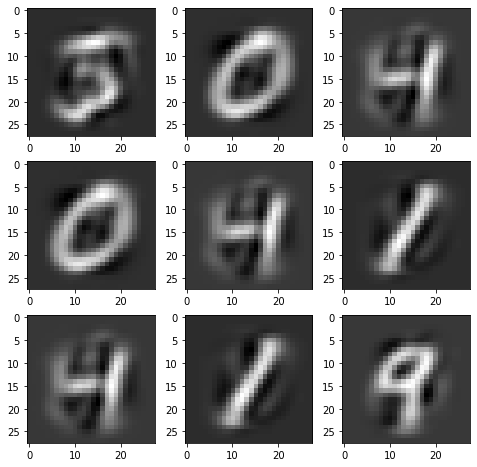

In [ ]:
from sklearn.decomposition import PCA

# run the model
pca = PCA(n_components=24)
train_X_pc = pca.fit_transform(df_X_train)

fig,axes = plt.subplots(nrows=3, ncols=3, figsize=(8,8))
for i in range(3):
  for j in range(3):
    img = pca.inverse_transform(train_X_pc[i+j].reshape(1,-1))
    axes[i,j].imshow(img.reshape(28,28), cmap=plt.get_cmap('gray'))

array([], dtype=float64)

In [ ]:
v = pca.explained_variance_ratio_
for i in range(1,len(v),10):
  print(f'summarized variance of {i}-pc is: {sum(v[0:i])}')

summarized variance of 1-pc is: 0.09704664359713872
summarized variance of 11-pc is: 0.5092416996186809
summarized variance of 21-pc is: 0.6542416189870338


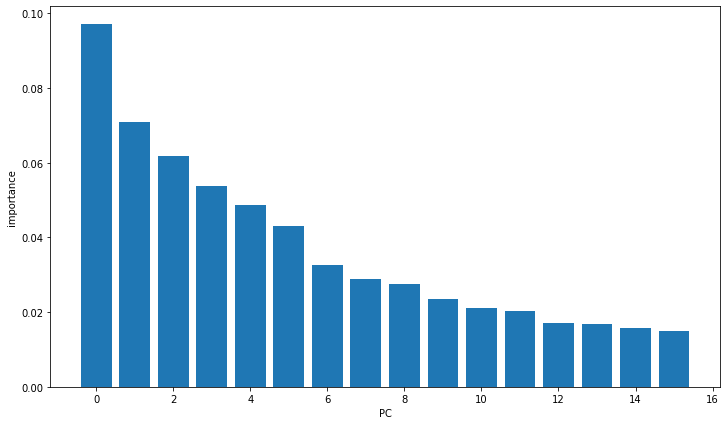

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel('PC')
plt.ylabel('importance')
plt.bar(np.arange(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_)
plt.show()